In [2]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("../../bin/imports.ipynb")

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.cancer.TCGA.conservative.mut.csv', index_col=0)
mutation_counts = pd.DataFrame(df.sum()).reset_index()
mutation_counts.columns = ['mutation', 'count']
lowly_recurrent = list(mutation_counts[mutation_counts['count'] <= 5].mutation)
mediumly_recurrent = list(mutation_counts[(mutation_counts['count'] > 5)&(mutation_counts['count'] <=20)].mutation)
highly_recurrent = list(mutation_counts[mutation_counts['count'] > 20].mutation)
print len(highly_recurrent), len(mediumly_recurrent), len(lowly_recurrent)

28 149 841


In [7]:
conserved_patients = list(df.index)

In [4]:
def get_values_from_df(df):
    values = []
    for a in df.values:
        values.extend(a)
    return values

In [8]:
value_types = []

In [9]:
# passenger
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.passenger.TCGA.conservative.mut.ClassII.csv', index_col=0)
values = get_values_from_df(df.ix[conserved_patients])
value_types.append(values)

In [10]:
# lowly recurrent
category = 'oncogenes'
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/patient_matrices/{0}.all.csv'.format(category), index_col=0)
app_restricted_space = [x for x in lowly_recurrent if x in df.index]
values = get_values_from_df(df.ix[app_restricted_space, conserved_patients])
value_types.append(values)
category = 'tsgenes'
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/patient_matrices/{0}.all.csv'.format(category), index_col=0)
app_restricted_space = [x for x in lowly_recurrent if x in df.index]
values = get_values_from_df(df.ix[app_restricted_space, conserved_patients])
value_types.append(values)

In [11]:
# lowly recurrent
category = 'oncogenes'
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/patient_matrices/{0}.all.csv'.format(category), index_col=0)
app_restricted_space = [x for x in mediumly_recurrent if x in df.index]
values = get_values_from_df(df.ix[app_restricted_space, conserved_patients])
value_types.append(values)
category = 'tsgenes'
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/patient_matrices/{0}.all.csv'.format(category), index_col=0)
app_restricted_space = [x for x in mediumly_recurrent if x in df.index]
values = get_values_from_df(df.ix[app_restricted_space, conserved_patients])
value_types.append(values)

In [12]:
# highly recurrent
category = 'oncogenes'
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/patient_matrices/{0}.all.csv'.format(category), index_col=0)
app_restricted_space = [x for x in highly_recurrent if x in df.index]
values = get_values_from_df(df.ix[app_restricted_space, conserved_patients])
value_types.append(values)
category = 'tsgenes'
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/patient_matrices/{0}.all.csv'.format(category), index_col=0)
app_restricted_space = [x for x in highly_recurrent if x in df.index]
values = get_values_from_df(df.ix[app_restricted_space, conserved_patients])
value_types.append(values)

In [13]:
df.shape

(602, 7290)

In [14]:
plotting = pd.DataFrame({'category': ['neither' for x in value_types[0]] + ['oncogenes' for x in value_types[1]] + ['tsgenes' for x in value_types[2]] + ['oncogenes' for x in value_types[3]] + ['tsgenes' for x in value_types[4]] + ['oncogenes' for x in value_types[5]] + ['tsgenes' for x in value_types[6]],
                         'recurrency': ['passenger' for x in value_types[0]] + ['low' for x in value_types[1]] + ['low' for x in value_types[2]] + ['medium' for x in value_types[3]] + ['medium' for x in value_types[4]] + ['high' for x in value_types[5]] + ['high' for x in value_types[6]],
                         'PHBR': value_types[0] + value_types[1] + value_types[2] + value_types[3] + value_types[4] + value_types[5] + value_types[6]})

In [15]:
for cat in ['passenger', 'low', 'medium', 'high']:
    print cat, mean(plotting[plotting.recurrency == cat].PHBR < 6)

passenger 0.254874453046
low 0.199270741766
medium 0.164247590655
high 0.076056642785


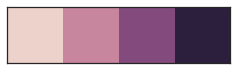

In [16]:
colors = sns.cubehelix_palette(4)
sns.palplot(colors)

In [17]:
plotting.recurrency.value_counts()

passenger    5942000
low          4896208
medium        873474
high          166376
Name: recurrency, dtype: int64

In [18]:
#print sp.mannwhitneyu(plotting[plotting.recurrency == 'passenger'].PHBR, plotting[plotting.recurrency == 'low'].PHBR)
#print sp.mannwhitneyu(plotting[plotting.recurrency == 'low'].PHBR, plotting[plotting.recurrency == 'medium'].PHBR)
#print sp.mannwhitneyu(plotting[plotting.recurrency == 'medium'].PHBR, plotting[plotting.recurrency == 'high'].PHBR)

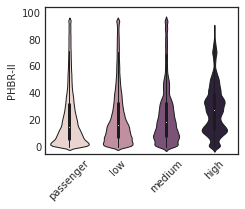

In [19]:
plt.figure(figsize=(3.5, 3))
sns.violinplot(x='recurrency', y='PHBR', data=plotting,
              palette=colors)
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('PHBR-II')
plt.ylim(-5, 105)
plt.tight_layout()
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/class_comparison/recurrency.conserved.pdf')

In [20]:
fraction = {}
for cat in ['passenger', 'low', 'medium', 'high']:
    fraction[cat] = []
for x in np.arange(0, 31, 1):
    print x
    for cat in ['passenger', 'low', 'medium', 'high']:
        fraction[cat].append(mean(plotting[plotting.recurrency == cat].PHBR < x))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [21]:
colors = sns.cubehelix_palette(4)

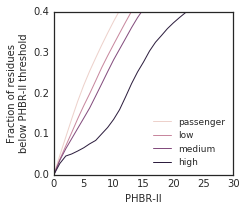

In [22]:
plt.figure(figsize=(3.5, 3))
for cat, color in zip(['passenger', 'low', 'medium', 'high'], colors):
    plt.plot(np.arange(0, 31, 1), fraction[cat], label=cat, color=color)
plt.legend(loc=4)
plt.xlim(0, 30)
plt.ylim(0, 0.4)
plt.ylabel('Fraction of residues\nbelow PHBR-II threshold')
plt.xlabel('PHBR-II')
plt.locator_params(axis='y', nbins=6)
L = plt.legend(loc=4, prop={'size': 9})
plt.tight_layout()
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/class_comparison/recurrency.cdf.conserved.pdf')

Removed from manuscript

In [14]:
def threshold(x):
    if x < 10:
        return 1
    else:
        return 0
plotting['PHBR_Threshold'] = plotting.PHBR.apply(threshold)

In [15]:
plotting.head()

,PHBR,category,recurrency,PHBR_Threshold
0,25.366790,neither,passenger,0
1,12.865381,neither,passenger,0
2,23.470557,neither,passenger,0
3,16.396217,neither,passenger,0
4,16.605717,neither,passenger,0


In [16]:
plotting_thresholds = pd.DataFrame({'Recurrency': ['Passenger', 'Low', 'Medium', 'High'],
                                    'Fraction': [plotting[plotting.recurrency == 'passenger'].PHBR_Threshold.mean(),
                                                 plotting[plotting.recurrency == 'low'].PHBR_Threshold.mean(),
                                                 plotting[plotting.recurrency == 'medium'].PHBR_Threshold.mean(),
                                                 plotting[plotting.recurrency == 'high'].PHBR_Threshold.mean()]})

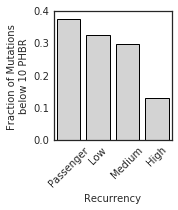

In [17]:
plt.figure(figsize=(2.5, 3))
sns.barplot(x='Recurrency', y='Fraction', data=plotting_thresholds, color='lightgrey')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylabel('Fraction of Mutations\nbelow 10 PHBR')
plt.locator_params(axis='y', nbins=5)
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/class_comparison/recurrency.threshold.pdf')